# Bus Type Assignment in a Synthetic Grid

In this notebook, we demonstrate how to assign bus types to the nodes in the synthetically generated grid, e.g., using the Chung-Lu-Chain model, among other methods. Assigning bus types is a necessary step towards a more realistic power grid synthesization.  

There exists a **correlation between the bus types and the grid topology characteristics**, which was investigated by [Elyas et al. (2016)](https://ieeexplore.ieee.org/document/7763878). The authors also proposed a numerical measure, namely **bus type entropy**, to characterize this correlation and then a statistics-based method to search the best bus type assignments. 

## Basics

In [1]:
import sys
import os
import networkx as nx
from collections import Counter

from powergrid_synth.generator import PowerGridGenerator
from powergrid_synth.input_configurator import InputConfigurator
from powergrid_synth.bus_type_allocator import BusTypeAllocator
from powergrid_synth.visualization import GridVisualizer

## Synthetic raw topology generation

We use the previous notebook, [TopologyGeneration.ipynb](TopologyGeneration.ipynb), for this, for three voltage levels given some limited information about the node degree distributions and the transformer connection distributions.

We refer readers to that notebook for the defined python variables.


[1] Configuring 3-Level Hierarchy...
Generating Level 0: DGLN distribution (Avg=4.0)
Generating Level 1: DPL distribution (Avg=3.0)
Generating Level 2: DGLN distribution (Avg=2.0)
Generating Transformers 0<->1: k-Stars Model
4.15
Generating Transformers 1<->2: k-Stars Model
4.15

[2] Generating Topology...
--- Starting Generation for 3 Voltage Levels ---
Generating Level 0...
  -> Level 0 Complete. Nodes: 21, Edges: 28
Generating Level 1...
  -> Level 1 Complete. Nodes: 26, Edges: 20
Generating Level 2...
  -> Level 2 Complete. Nodes: 12, Edges: 11
Generating Transformer Connections...
  -> Connecting Level 0 <-> Level 1
  -> Connecting Level 1 <-> Level 2
Filtering for Largest Connected Component (LCC)...
  -> Kept 52 nodes (removed 7 isolated nodes).
Grid Generated: 52 nodes, 64 edges

[3] Visualizing Full Grid Topology...
Calculating layout 'kamada_kawai'...


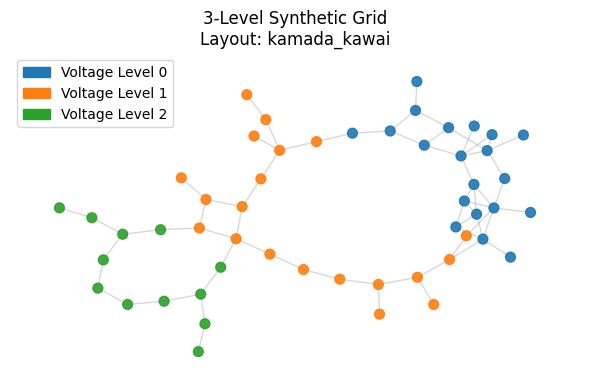


[3] Visualizing Sub-Grid Topology...
Calculating layout 'kamada_kawai'...
Calculating layout 'kamada_kawai'...
Calculating layout 'kamada_kawai'...


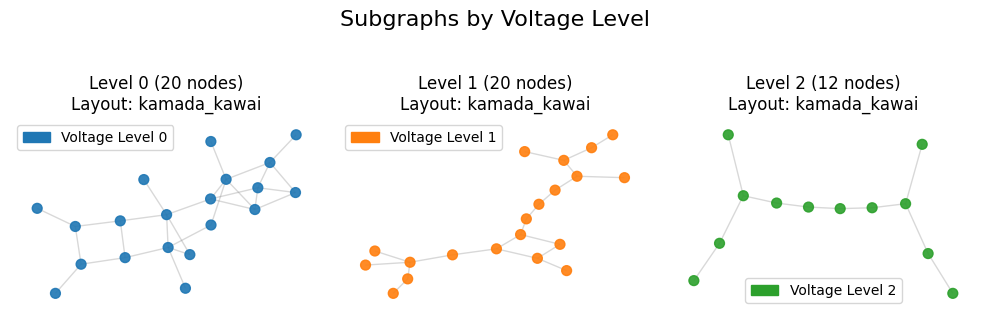


[4] Running Hierarchical Analysis...

GLOBAL GRID ANALYSIS

=== Power Grid Topological Analysis ===
Nodes: 52
Edges: 64
Density: 0.048265
Connected: Yes
Diameter: 15
Avg Shortest Path Length: 6.6523
Avg Local Clustering Coeff: 0.0647

Plotting Global Degree Distribution...


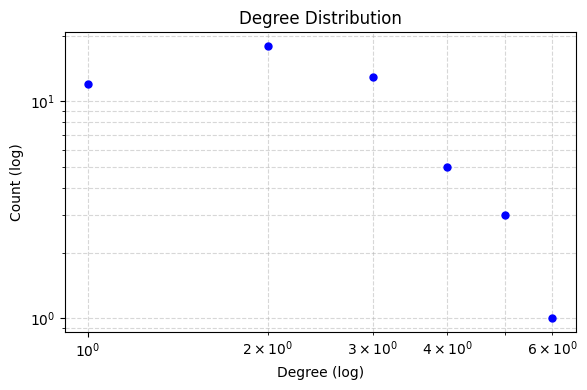


ANALYSIS FOR VOLTAGE LEVEL 0

=== Power Grid Topological Analysis ===
Nodes: 20
Edges: 28
Density: 0.147368
Connected: Yes
Diameter: 7
Avg Shortest Path Length: 3.1105
Avg Local Clustering Coeff: 0.1733


ANALYSIS FOR VOLTAGE LEVEL 1

=== Power Grid Topological Analysis ===
Nodes: 20
Edges: 20
Density: 0.105263
Connected: Yes
Diameter: 12
Avg Shortest Path Length: 4.9895
Avg Local Clustering Coeff: 0.0000


ANALYSIS FOR VOLTAGE LEVEL 2

=== Power Grid Topological Analysis ===
Nodes: 12
Edges: 11
Density: 0.166667
Connected: Yes
Diameter: 9
Avg Shortest Path Length: 3.8485
Avg Local Clustering Coeff: 0.0000

Plotting Combined Figure for 3 Levels (Log Scale: True)...


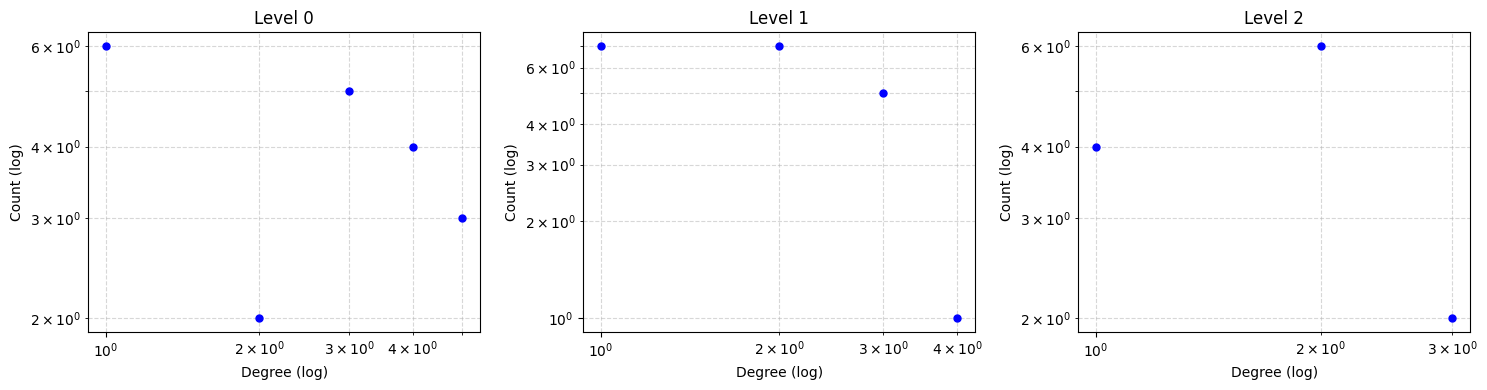

Analysis Complete.


In [2]:
%run TopologyGeneration.ipynb

## Bus Type Assignment

In [3]:
allocator = BusTypeAllocator(grid_graph, entropy_model=1)
# We use a moderate iteration count for the demo
bus_types = allocator.allocate(max_iter=100, population_size=100)

Starting Bus Type Allocation (N=52, M=64)...
  Target Entropy Score (W*): 158.7500, Std Dev: 3.8807
  Iter 0: Best Error = 0.109931
  Iter 10: Best Error = 0.007498
  Iter 20: Best Error = 0.007498
  Iter 30: Best Error = 0.004802
  Iter 40: Best Error = 0.004802
  Converged at iteration 42. Error: 0.001541 < Criteria: 0.003881


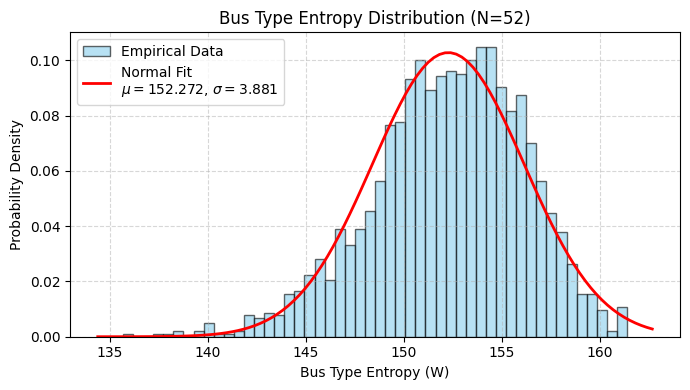

In [4]:
allocator.plot_entropy_pdf(figsize=(7,4))

-----> Assignment Complete:
       Generators: 15 (28.8%)
       Loads:      25 (48.1%)
       Connectors: 12 (23.1%)

[5] Visualizing Bus Types & Edge Styles...
Calculating layout 'kamada_kawai' for bus types...


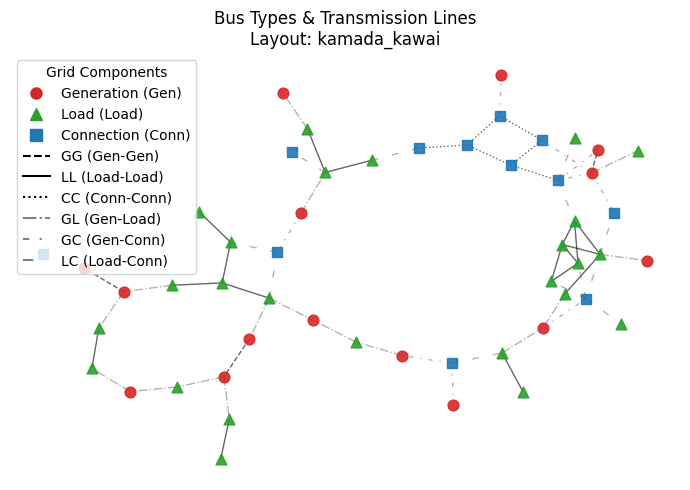

In [5]:
# Assign bus types as graph node attributes
nx.set_node_attributes(grid_graph, bus_types, name="bus_type")
# Show stats
counts = Counter(bus_types.values())
total = sum(counts.values())
print(f"-----> Assignment Complete:")
print(f"       Generators: {counts['Gen']} ({counts['Gen']/total:.1%})")
print(f"       Loads:      {counts['Load']} ({counts['Load']/total:.1%})")
print(f"       Connectors: {counts['Conn']} ({counts['Conn']/total:.1%})")

# --- 5. Bus Type Visualization ---
print("\n[5] Visualizing Bus Types & Edge Styles...")

# Call the new interactive method
viz.plot_bus_types(
    grid_graph, 
    layout='kamada_kawai', 
    title="Bus Types & Transmission Lines", 
    figsize=(7,5)
)